In [10]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import gensim
import gensim.corpora as corpora

In [11]:
data = pd.read_csv(r"D:\Anaconda\news_articles.csv")
articles = data['content']

In [12]:
# Removing Punctuations and making lowercase
articles = articles.astype(str).str.lower().apply(lambda x : (re.sub(r"[^\w\s]", " ", x)))

# Removing stopwords
en_stopwords = stopwords.words('english')
articles = articles.apply(lambda x : ' '.join([word for word in x.split() if word not in (en_stopwords)]))

# Tokenize text into words
articles = articles.apply(lambda x : word_tokenize(x))

# Stemming the words ( Lemmatizing is not used as it will take lots of data and time to process)
ps = PorterStemmer()
articles = articles.apply(lambda tokens : [ps.stem(token) for token in tokens])

In [13]:
dictionary = corpora.Dictionary(articles)
print (dictionary)

Dictionary<8635 unique tokens: ['10', '100', '108', '15', '155']...>


In [14]:
doc_term = [dictionary.doc2bow(text) for text in articles]


In [15]:
num_topics = 3
lda_model = gensim.models.LdaModel(corpus = doc_term, id2word = dictionary, num_topics = num_topics)
lda_model.print_topics(num_topics=num_topics,num_words = 5)

[(0,
  '0.020*"mr" + 0.015*"said" + 0.010*"trump" + 0.004*"would" + 0.004*"state"'),
 (1, '0.015*"mr" + 0.014*"said" + 0.005*"one" + 0.004*"new" + 0.004*"would"'),
 (2,
  '0.015*"mr" + 0.015*"said" + 0.005*"state" + 0.005*"would" + 0.004*"one"')]

In [16]:
from gensim.models import LsiModel

In [17]:
lsi_model = LsiModel(corpus = doc_term, id2word = dictionary, num_topics = num_topics)
print(lsi_model.print_topics(num_topics = num_topics, num_words = 5))

[(0, '0.616*"mr" + 0.430*"said" + 0.188*"trump" + 0.131*"state" + 0.119*"would"'), (1, '-0.537*"mr" + -0.319*"trump" + 0.286*"said" + 0.243*"saudi" + 0.143*"weight"'), (2, '0.459*"saudi" + 0.264*"taliban" + -0.255*"weight" + -0.194*"dr" + 0.193*"afghanistan"')]


In [29]:
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [30]:
coherence_values = []
model_list = []
min_topics = 2
max_topics = 11

In [31]:
for num_topics_i in range(min_topics, max_topics+1):
   model = LsiModel(corpus = doc_term,id2word = dictionary, num_topics = num_topics)
   model_list.append(model)
   coherence_model = CoherenceModel(model = model, texts=articles,dictionary = dictionary, coherence = 'c_v')
   coherence_values.append(coherence_model.get_coherence())

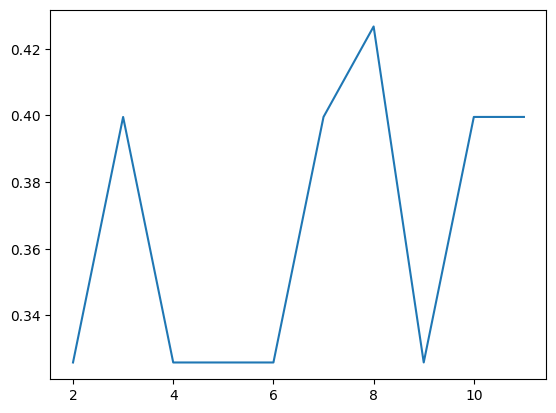

In [32]:
plt.plot(range(min_topics,max_topics+1),coherence_values)

In [33]:
num_topics = 8
lda_model = gensim.models.LdaModel(corpus = doc_term, id2word = dictionary, num_topics = num_topics)
lda_model.print_topics(num_topics=num_topics,num_words = 5)

[(0, '0.017*"mr" + 0.017*"said" + 0.005*"one" + 0.005*"peopl" + 0.004*"year"'),
 (1,
  '0.022*"mr" + 0.012*"said" + 0.007*"trump" + 0.004*"would" + 0.004*"one"'),
 (2,
  '0.018*"mr" + 0.015*"said" + 0.007*"trump" + 0.006*"state" + 0.005*"would"'),
 (3,
  '0.017*"mr" + 0.016*"said" + 0.005*"state" + 0.005*"would" + 0.005*"year"'),
 (4, '0.010*"mr" + 0.010*"said" + 0.006*"trump" + 0.004*"one" + 0.004*"ms"'),
 (5,
  '0.022*"mr" + 0.015*"said" + 0.005*"trump" + 0.005*"would" + 0.004*"like"'),
 (6,
  '0.020*"said" + 0.015*"mr" + 0.005*"would" + 0.005*"trump" + 0.005*"year"'),
 (7,
  '0.012*"mr" + 0.011*"said" + 0.008*"trump" + 0.004*"one" + 0.004*"would"')]